In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
from warnings import filterwarnings
filterwarnings('ignore')

In [85]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [82]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [58]:
cart_model = DecisionTreeRegressor()

In [59]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

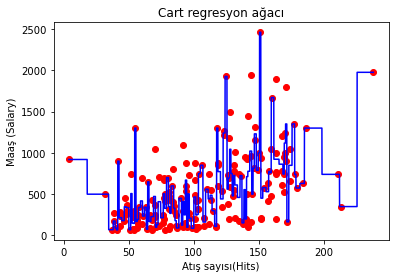

In [60]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X_train,y_train,color="red")
plt.plot(X_grid,cart_model.predict(X_grid),color ="blue")
plt.title("Cart regresyon ağacı")
plt.xlabel("Atış sayısı(Hits)")
plt.ylabel("Maaş (Salary)")
plt.show()

In [61]:
from skompiler import skompile
print(skompile(cart_model.predict).to('python/code'))

((920.0 if x[0] <= 18.0 else ((500.0 if x[0] <= 34.5 else (70.0 if x[0] <= 
    38.0 else 175.0) if x[0] <= 39.5 else 90.0 if x[0] <= 40.5 else 67.5) if
    x[0] <= 41.5 else 900.0 if x[0] <= 42.5 else (((((215.55566666666667 if
    x[0] <= 44.5 else 180.0) if x[0] <= 46.5 else 347.5 if x[0] <= 48.0 else
    337.5) if x[0] <= 50.0 else 70.0) if x[0] <= 51.5 else 507.5) if x[0] <=
    52.5 else 150.0 if x[0] <= 53.5 else 146.83333333333334) if x[0] <= 
    54.5 else 1300.0 if x[0] <= 55.5 else (170.0 if x[0] <= 56.5 else 
    193.75) if x[0] <= 57.5 else ((((((340.0 if x[0] <= 59.0 else 418.5) if
    x[0] <= 60.5 else 235.0 if x[0] <= 62.0 else 341.667) if x[0] <= 63.5 else
    75.0) if x[0] <= 64.5 else 650.0) if x[0] <= 65.5 else 170.0 if x[0] <=
    67.0 else 228.66666666666666) if x[0] <= 69.0 else 472.5) if x[0] <= 
    70.5 else (100.0 if x[0] <= 71.5 else 130.0) if x[0] <= 72.5 else 
    409.16650000000004 if x[0] <= 74.5 else 215.0) if x[0] <= 76.5 else (((
    505.0 if x[0] <= 

In [65]:
# bütün datanın ortalama value değeri
df["Salary"].mean()

535.9258821292775

In [64]:
# sol nodes'un ortalama value değeri
df.loc[:,"Salary"][df.iloc[:,8]<=450].mean()

227.85470085470087

In [54]:
cart_model = DecisionTreeRegressor(max_depth=4, min_samples_split=40)
cart_model.fit(X, y)

DecisionTreeRegressor(max_depth=4, min_samples_split=40)

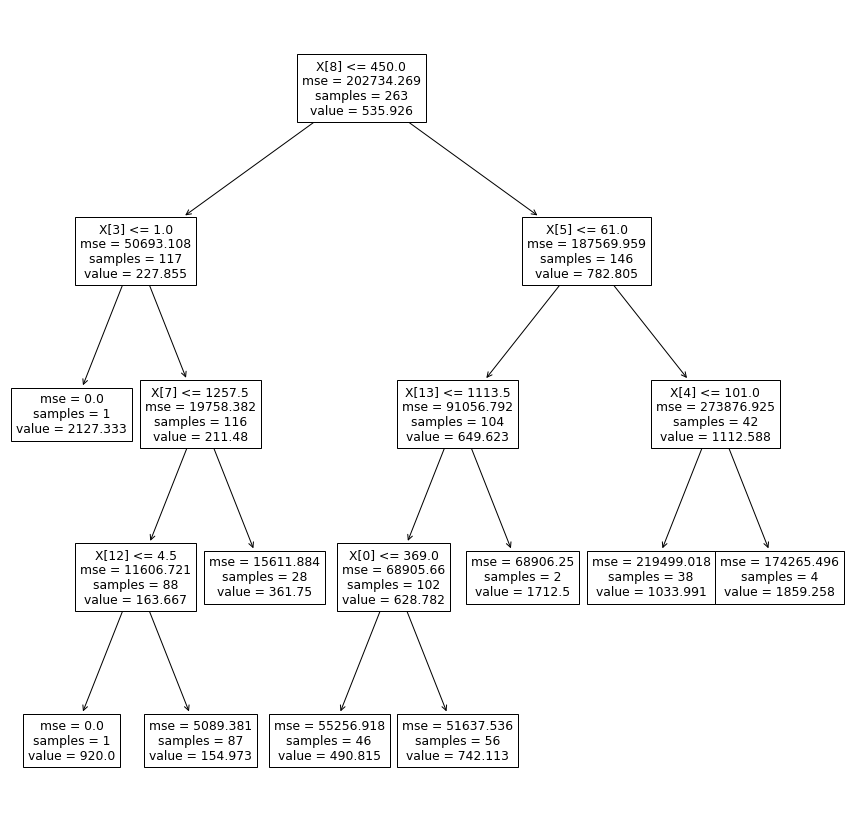

In [55]:
plt.figure(figsize=(15, 15))
tree.plot_tree(cart_model);

ilk value ana datanın ortalama value değeridir. daha sonra bölünen datalara göre hesaplanır.

### Tahmin

In [66]:
x =[91]

In [67]:
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

345.2011551724138

In [68]:
cart_model.predict(X_test)[:5]

array([ 725.    , 1230.    ,  725.    ,  504.1665,   67.5   ])

In [69]:
cart_model.predict([[91]])

array([125.])

In [71]:
y_pred = cart_model.predict(X_test)

In [74]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

### Model Tuning

In [86]:
# hiçbir özel parametre vermeden genel gözlem yapıyoruz.

cart_model2 = DecisionTreeRegressor()
cart_model2.fit(X_train, y_train)
y_pred = cart_model2.predict(X_test)

In [87]:
# mse gözlemleyip gridsearch yapıyoruz. Daha sonra best params'a göre tekrar modelleyeceğiz.

np.sqrt(mean_squared_error(y_test, y_pred))

522.4406878961854

In [91]:
cart_params = {"min_samples_split": range(2,30),
               "min_samples_leaf": [10, 15, 20],
               "max_leaf_nodes": range(4,8)
}

In [92]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv=10)

In [93]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(4, 8),
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': range(2, 30)})

In [94]:
cart_cv_model.best_params_

{'max_leaf_nodes': 6, 'min_samples_leaf': 20, 'min_samples_split': 2}

In [99]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes= 6, min_samples_leaf= 20, min_samples_split= 2)

In [100]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=6, min_samples_leaf=20)

In [101]:
y_pred = cart_tuned.predict(X_test)

In [102]:
np.sqrt(mean_squared_error(y_test, y_pred))

412.8694422094488

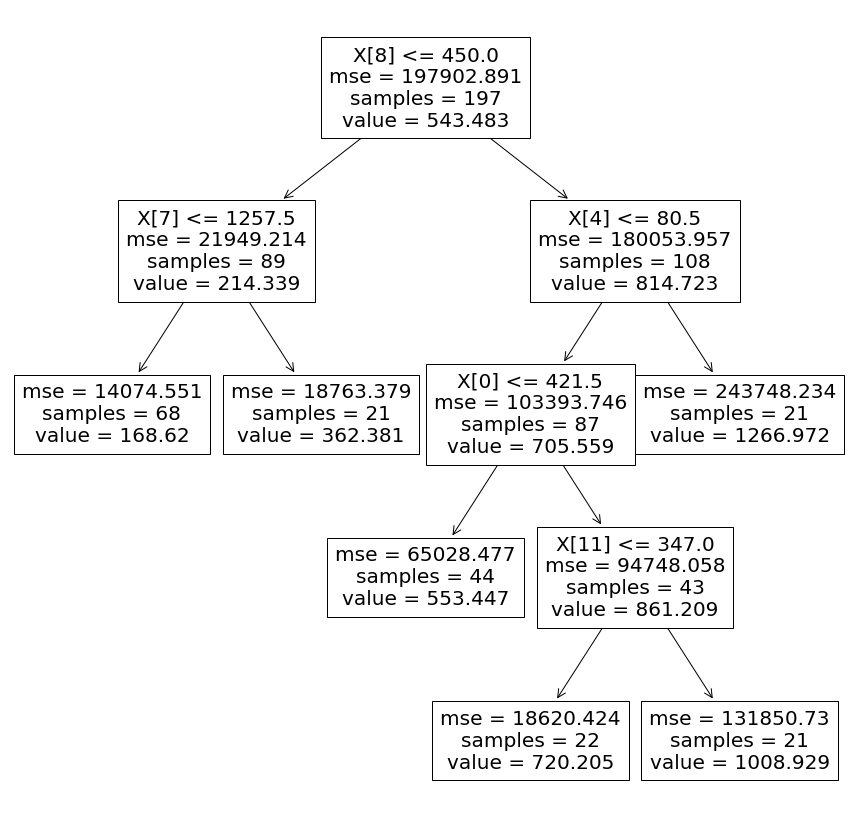

In [103]:
plt.figure(figsize=(15, 15))
tree.plot_tree(cart_tuned);

## Random Forests

In [135]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [136]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((537, 8), (537,), (231, 8), (231,))

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [ ]:
# burada eger tree sayisi vermezsek 100 tane default tree olusturuyor 
# criterion olarak default gini geliyor

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(xtrain, ytrain)
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [139]:
y_pred = rf_model.predict(X_test)

In [140]:
accuracy_score(y_test, y_pred)

0.7359307359307359

In [141]:
cart_grid = {"max_depth": [2,3,4],
             "min_samples_split": list(range(2,50))
}

In [143]:
# bir seçtiğini bir daha seçme dersek random forests'ın hiçbir gücü kalmıyor.
# mantığı gereği tekrarlı seçmeye eğilimli bir algoritmadır.
# rastsallığı arttırdığı için overfitting engellenmiş oluyor.

cart = DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv=10, n_jobs=-1, verbose=2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:    8.8s finished


In [145]:
print("en iyi parametreler: " + str(cart_cv_model.best_params_))

en iyi parametreler: {'max_depth': 4, 'min_samples_split': 19}


### Model Tuning

In [147]:
rf_model

RandomForestClassifier()

In [153]:
rf_params = {"max_depth": [2,5,8,10],
             "max_features": [2,5,8],
             "n_estimators": [10,50,100,],
             "min_samples_split": [5,10]
}

In [154]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=2)


In [155]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   51.7s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   53.8s finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [5, 10],
                         'n_estimators': [10, 50, 100]},
             verbose=2)

In [156]:
print("en iyi parametreler: " + str(rf_cv_model.best_params_))

en iyi parametreler: {'max_depth': 5, 'max_features': 5, 'min_samples_split': 10, 'n_estimators': 10}


### Final 

In [159]:
rf_tuned = RandomForestClassifier(max_depth=5, max_features=5, min_samples_split=10, n_estimators=10)
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=5, min_samples_split=10,
                       n_estimators=10)

In [160]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

In [161]:
Importance = pd.DataFrame({"Importance":rf_tuned.feature_importances_*100}, index=X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

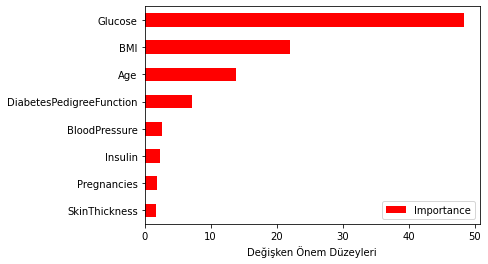

In [163]:
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r')
plt.xlabel("Değişken Önem Düzeyleri")

## Random Forests Regression

In [186]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_= df.drop(["Salary","League", "Division", "NewLeague"], axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [187]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [191]:
rf_model_reg = RandomForestRegressor(random_state=42)

In [192]:
rf_model_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Tahmin

In [193]:
rf_model_reg.predict(X_test)[:5]

array([ 740.62167,  895.99497, 1184.695  ,  139.65167,  634.75833])

In [194]:
y_pred = rf_model_reg.predict(X_test)

In [195]:
np.sqrt(mean_squared_error(y_test, y_pred))

345.00286717448006

### Model Tuning

In [196]:
rfr_params = {"max_depth": list(range(1,5)),
              "max_features": [3,5,7],
              "n_estimators": [10,20,50]}
rfr_model = RandomForestRegressor(random_state=42)

rfr_cv_model = GridSearchCV(rfr_model, 
                           rfr_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2)
rfr_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 260 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   15.3s finished


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4], 'max_features': [3, 5, 7],
                         'n_estimators': [10, 20, 50]},
             verbose=2)

In [197]:
rfr_cv_model.best_params_

{'max_depth': 3, 'max_features': 5, 'n_estimators': 50}

In [198]:
rf_tuned = RandomForestRegressor(max_depth=3, max_features=5, n_estimators=50)

In [199]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, max_features=5, n_estimators=50)

In [200]:
y_pred = rf_tuned.predict(X_test)

In [202]:
# önceki mse 345'ti düzenleme yapınca 338'e düştü.

np.sqrt(mean_squared_error(y_test, y_pred))

338.6064739955552

In [203]:
Importance = pd.DataFrame({"Importance":rf_tuned.feature_importances_*100}, index=X_train.columns)

In [ ]:
# feature selection yapılırken önem katsayılarına göre buradan feature seçilip modelleme yapılabilir.

Text(0.5, 0, 'Değişken Önem Düzeyleri')

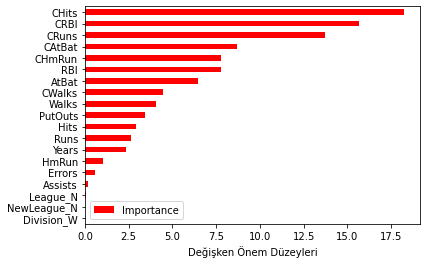

In [204]:
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r')
plt.xlabel("Değişken Önem Düzeyleri")

## Neural Networks

In [5]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_= df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
# hem train hem test için standarlaştırma yapılmalı.
# önce X scale edilip daha sonra X_train, X_test diye de bölünebilir.

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [8]:
X_train_scaled = scaler.transform(X_train)

In [9]:
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.neural_network import MLPRegressor

In [11]:
mlp_model = MLPRegressor(hidden_layer_sizes=(100,20)).fit(X_train_scaled, y_train)

In [ ]:
mlp_model = MLPRegressor(hidden_layer_sizes=(100,20)).fit(x_train_scaled, y_train)
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [12]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [13]:
mlp_model.n_layers_

4

In [14]:
mlp_model.hidden_layer_sizes

(100, 20)

### tahmin

In [15]:
y_pred = mlp_model.predict(X_test_scaled)

In [16]:
np.sqrt(mean_squared_error(y_test, y_pred))

498.63032888777536

In [17]:
mlp_param = {"alpha": [0.1,0.01,0.02,0.005],
             "hidden_layer_sizes": [(20,20), (100,50,150), (40,25,20)],
             "activation": ["relu","logistic"]}

In [18]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_param, cv=10)

In [19]:
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (40, 25, 20)]})

In [20]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.02, 'hidden_layer_sizes': (100, 50, 150)}

### Model Tuning

In [21]:
mlp_tuned = MLPRegressor(activation='relu', alpha=0.02, hidden_layer_sizes=(100, 50, 150))

In [22]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.02, hidden_layer_sizes=(100, 50, 150))

In [24]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [25]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.48357979542607

### Yapay Sinir Ağları

In [26]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
scaler = StandardScaler()

In [28]:
scaler.fit(X_train)

StandardScaler()

In [29]:
X_train_scaled = scaler.transform(X_train)

In [30]:
X_test_scaled = scaler.transform(X_test)

In [31]:
X_test_scaled[:5]

array([[ 0.69748316, -0.70719864, -0.64639893,  0.81207927,  0.95720244,
         0.26575953, -0.11680393,  0.85019217],
       [-0.52953881, -0.27388818,  0.29399563,  0.74746428, -0.6936878 ,
         0.488933  , -0.94192338, -1.03426754],
       [-0.52953881, -0.39769117, -0.31449497, -1.3202154 , -0.6936878 ,
        -0.1543317 , -0.91266382, -1.03426754],
       [ 1.31099414, -0.42864191,  0.57058226, -1.3202154 , -0.6936878 ,
        -0.96825847,  1.12965312,  0.07927683],
       [ 1.00423865,  0.46892976,  1.12375553, -1.3202154 , -0.6936878 ,
        -0.27248236, -0.76051413,  1.44979298]])

In [32]:
from sklearn.neural_network import MLPClassifier

In [34]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [37]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7272727272727273

### Model Tuning

In [38]:
mlpc

MLPClassifier()

In [41]:
mlp_param2 = {"alpha": [0.1,0.01,0.02,0.005],
             "hidden_layer_sizes": [(10,10,10),
                                    (20,20), 
                                    (100,50,150), 
                                    (300,200,150),
                                    (3,5),
                                    (5,3)],
             "activation": ["relu","logistic"],
             "solver": ["lbfgs", "adam","sgd"]}

In [ ]:
mlp_param2 = {"alpha": [0.1,0.01,0.02,0.005],
             "hidden_layer_sizes": [(10,10,10),
                                    (20,20), 
                                    (100,50,150), 
                                    (300,200,150),
                                    (3,5),
                                    (5,3)],
             "activation": ["relu","logistic"],
             "solver": ["lbfgs", "adam","sgd"]}


mlp_cv_model = GridSearchCV(mlp_model, mlp_param2, cv=10, n_jobs=-1, verbose=2)
mlp_cv_model.fit(x_train_scaled, ytrain)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 21.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08,
                                     hidden_layer_sizes=(100, 20),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
        

In [ ]:
mlp_cv_model.best_params_

{'activation': 'relu',
 'alpha': 0.005,
 'hidden_layer_sizes': (300, 200, 150),
 'solver': 'sgd'}

In [45]:
mlp_tuned = MLPClassifier(alpha= 0.005, hidden_layer_sizes=(300,200,150), activation="relu", solver="sgd")
mlp_tuned.fit(X_train_scaled, y_train)
y_pred = mlp_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7272727272727273

In [46]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.5222329678670935